## Library Imports

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import re
import sys
sys.path.append("..")  
import metaprivBIDS_stat as ST
from metaprivBIDS_stat import plot_calc
from metaprivBIDS_stat import rst_outlier_case2

## File from OpenNeuro Import
NIMH is the raw dataset "The NIMH Healthy Research Volunteer Dataset" taken from OpenNeuro. 


In [ ]:
NIMH = 'https://s3.amazonaws.com/openneuro.org/ds004215/phenotype/demographics.tsv?versionId=ZrtBS977QEYq4f0_sP.3.gorcpzILsMC'
NIMH = pd.read_csv(NIMH, sep='\t')
NIMH.to_csv('data_ds004215/nimh_dataset_ds004215.csv', sep=',', index=False)
NIMH.shape

In [3]:
###### NIMH dataset currently down on openneuro taking from folder (28th november 2024)
NIMH = pd.read_csv('data_ds004215/nimh_dataset_ds004215.csv', sep=',')

## Save to CSV

In [148]:
NIMH.replace({np.nan: -999}, inplace=True)
NIMH.to_csv('data_ds004215/nimh_dataset_ds004215.csv', sep=',', index=False)

## Load in of results calculated using (MetaprivBIDS App)

The selected quasi identifers are: 
- WORK_NIH_CAMPUS
- INCOME
- EDUCATION
- EMPLOYMENT
- age_at_visit
- RACE_1
- MARITAL_STATUS
- LGBT_IDENTITY
- GENDER
- ETHNICITY_1
- OTHER_LANGUAGES
- LANGUAGE
- CURRENT_GENDER


The selected sensitive variables are:
- RACE_1
- INCOME

The dis-score fraction is the default 0.3 & missing values are indicated as -999.

In [4]:
suda = pd.read_csv('data_ds004215/suda_ds004215.csv', sep=',')
pif = pd.read_csv('data_ds004215/pif_ds004215.csv', sep=',',index_col='Unnamed: 0').sort_index()
suda_field_score =  pd.read_csv('data_ds004215/att_suda.csv', sep=',').drop(columns=['Unnamed: 0'], errors='ignore')
k_combined_field =  pd.read_csv('data_ds004215/normalized_difference_results.csv', sep=',').drop(columns=['Difference in Unique Rows','Unique Rows After Removal']).rename(columns={'Column': 'variable'})
k_combined_all = pd.read_csv('data_ds004215/k-combined-3-13.csv', sep=',')
k_combined_field_non_risk = pd.read_csv('data_ds004215/normalized_difference_results_non.csv', sep=',').drop(columns=['Difference in Unique Rows','Unique Rows After Removal']).rename(columns={'Column': 'variable'})

## Using MetaprivBIDS stats import to calculate Pearson and Spearman correlation on field and row level.


        ROW LEVEL CORRELATION      

Spearman Rank Correlation between suda & pif: 0.88, P-value: 0.0000
Kendall's Tau between suda & pif: 0.70, p-value: 0.0000
Pearson Correlation between suda & pif: 0.46


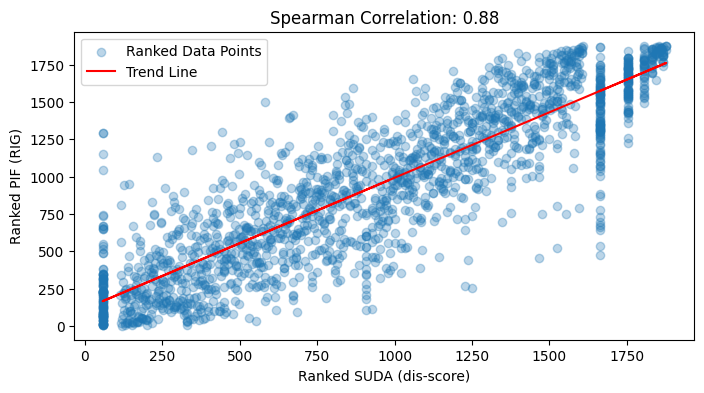

____________________________________________________________________________________

      FIELD LEVEL CORRELATIONS     

Pearson Correlation between SUDA & PIF field level: 0.71
Pearson Correlation between K-combined & PIF field level: -0.11
Pearson Correlation between SUDA & K-combined field level: -0.34


Spearman Rank Correlation between PIF & SUDA: 0.89, P-value: 0.0001
Spearman Rank Correlation between PIF & K: 0.13, P-value: 0.6806
Spearman Rank Correlation between SUDA & K: -0.15, P-value: 0.6331


In [5]:
ST.stats(suda, pif, suda_field_score, k_combined_field)

## Iterating through all possible combination of variables & calculating the correlation between SUDA, K-Global and PIF 

In [6]:
sum_score_df  = ST.calculate_summed_dis_scores(k_combined_all, NIMH, sample_fraction=0.3, missing_value= np.nan)

Spearman Correlation between Suda sum and K-combined: -0.80
Pearson Correlation between Suda sum and K-combined: -0.42


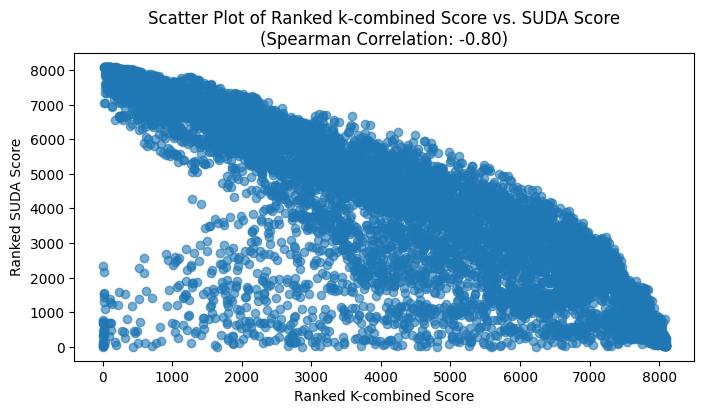

________________________________________________________________________


Spearman Correlation between PIF 95% and K-combined: -0.67
Pearson Correlation between PIF 95% and K-combined: -0.34


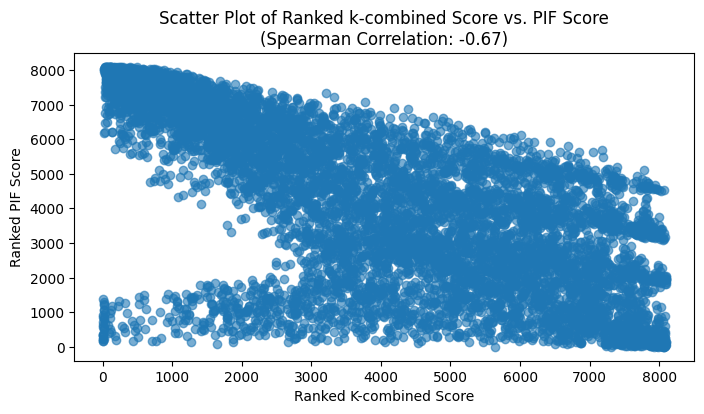

________________________________________________________________________


Spearman Correlation between PIF 95% and SUDA: 0.88
Pearson Correlation between PIF 95% and SUDA: 0.92


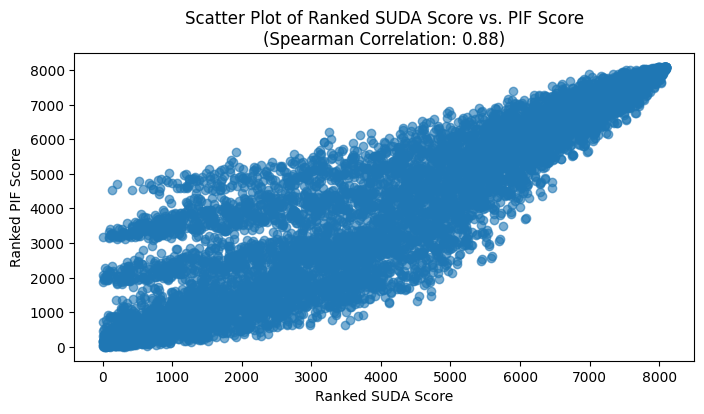

In [7]:
plot_calc(sum_score_df)

### Highest age at NIMH dataset

In [6]:
NIMH['age_at_visit'].max()

'90+'

# T-test between risky and non-risky k-global values for variables. 


In [54]:
k_combined_field

,variable,Normalized Difference
0,WORK_NIH_CAMPUS,18.5
1,INCOME,11.3
2,EDUCATION,8.0
3,EMPLOYMENT,5.2
4,age_at_visit,5.1
5,RACE_1,4.4
6,MARITAL_STATUS,4.2
7,LGBT_IDENTITY,3.2
8,GENDER,2.5
9,ETHNICITY_1,2.3


In [55]:
k_combined_field_non_risk

,variable,Normalized Difference
0,GENDER,72.5
1,PARTICIPATE_NIH_STUDY,66.5
2,SETTING,45.0
3,TRANSPORTATION,44.5
4,PARTICIPATE_STUDY_2,33.5
5,REFERRAL_TYPE,27.6
6,PARTICIPATE_STUDY,26.5
7,PARTICIPATE_STUDY_3,21.0
8,REFERRAL_TYPE_SECONDARY,13.5
9,visit,2.0


## Result of Paired T-test

In [56]:
mean_risk_values = (k_combined_field['Normalized Difference']).mean()
print('Mean, risk identifiers:',mean_risk_values)

mean_risk_values = (k_combined_field_non_risk['Normalized Difference']).mean()
print('Mean, non-risk identifiers:',mean_risk_values)
t, p = stats.ttest_ind(k_combined_field['Normalized Difference'], k_combined_field_non_risk['Normalized Difference'])
print('t:',t,'p-value:', p)

Mean, risk identifiers: 5.023076923076924
Mean, non-risk identifiers: 17.945
t: -1.944772723936649 p-value: 0.060922650087905574


# Outlier detection for PIF & SUD

In [150]:
class_outliers, madn, mad, outlier_indices, above_outlier_indices = ST.rst_outlier_case2(suda, 'dis-score')
print(len(above_outlier_indices))
class_outliers, madn, mad, outlier_indices, above_outlier_indices = rst_outlier_case2(pif, 'RIG')
print(len(above_outlier_indices))


0
47


## Outlier Participants

In [47]:
outlier_indices

[72,
 106,
 111,
 118,
 207,
 239,
 259,
 431,
 446,
 468,
 469,
 483,
 553,
 556,
 582,
 664,
 674,
 775,
 847,
 863,
 885,
 896,
 909,
 935,
 936,
 939,
 1038,
 1042,
 1110,
 1139,
 1193,
 1332,
 1380,
 1463,
 1564,
 1644,
 1739,
 1759,
 1779,
 1783,
 1793,
 1804,
 1821,
 1854]

### Selected outlier participant

In [64]:
 NIMH.loc[582]

participant_id                                         sub-ON75314
visit                                             online screening
age_at_visit                                                    28
WORK_NIH_CAMPUS                                                0.0
PARTICIPATE_NIH_STUDY                                          0.0
GENDER                                                         2.0
CURRENT_GENDER                                                 1.0
CURRENT_GENDER_2                                               NaN
CURRENT_GENDER_SPFY                                           -999
LGBT_IDENTITY                                                  2.0
LGBT_IDENTITY_2                                                NaN
LGBT_IDENTITY_SPFY                                            -999
RACE_1                                                         5.0
RACE_1_2                                                       NaN
RACE_1_3                                                      

## Generalising Language Variable 

In [81]:
NIMH['OTHER_LANGUAGE']

0                             -999
1                             -999
2                             -999
3                             -999
4       Czech, Italian, and German
                   ...            
1872                          -999
1873                          -999
1874                       Italian
1875                          -999
1876           Some french, german
Name: OTHER_LANGUAGE, Length: 1877, dtype: object

In [106]:
def split_languages(entry):
    if pd.isna(entry):
        return [entry, np.nan]
    
    split_entry = re.split(r'\s+and\s+|,\s*|/\s*', entry)
    split_entry = [lang.strip() for lang in split_entry]
    if len(split_entry) == 1:
        split_entry.append(np.nan)
    return split_entry

NIMH['LANGUAGE'] = NIMH['LANGUAGE'].str.lower().str.strip()

NIMH['LANGUAGE'] = NIMH['LANGUAGE'].replace({
    'englush': 'english',  
    'enlgish':'english',
    'engliash':'english',
    'englich': 'english'
    
})

NIMH['OTHER_LANGUAGE'] = NIMH['OTHER_LANGUAGE'].str.lower().str.strip()

NIMH['OTHER_LANGUAGE'] = NIMH['OTHER_LANGUAGE'].replace({
    'englush': 'english',  
    'enlgish':'english',
    'engliash':'english',
    'englich': 'english'
    
})

# Assign 1 only where OTHER_LANGUAGE is not -999, contains a comma, or includes other languages
NIMH.loc[
    NIMH['OTHER_LANGUAGE'].apply(
        lambda x: isinstance(x, str) and x != '-999' and (',' in x or 'english' not in x.lower())
    ),
    'OTHER_LANGUAGE'
] = 1

In [109]:
NIMH.loc[
    NIMH['OTHER_LANGUAGE'].apply(
        lambda x: (
            isinstance(x, str) and 
            x != '-999' and  # Exclude -999
            'english' in x.lower() and 
            x.strip().lower() != 'english'
        )
    ),
    'OTHER_LANGUAGE'
] = 1

In [112]:
NIMH.loc[
    NIMH['OTHER_LANGUAGE'].apply(
        lambda x: isinstance(x, str) and x.strip().lower() == 'english'
    ),
    'OTHER_LANGUAGE'
] = 0


In [113]:
NIMH[['LANGUAGE','OTHER_LANGUAGE']]

,LANGUAGE,OTHER_LANGUAGE
0,english,-999
1,english,-999
2,english,-999
3,english,-999
4,english,1
...,...,...
1872,english,-999
1873,english,-999
1874,english,1
1875,english,-999


In [114]:
NIMH['OTHER_LANGUAGE'].value_counts()

-999    1008
1        795
0         74
Name: OTHER_LANGUAGE, dtype: int64

## Saving improved dataset for further analysis in MetaprivBIDS app

In [ ]:
NIMH.to_csv('data_ds004215/nimh_improved_dataset_ds004215.csv', sep=',', index=False)